In [46]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('train.csv')

# 8. Modelo de regresión lineal

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:40:20   Log-Likelihood:                -13842.
No. Observations:                1168   AIC:                         2.775e+04
Df Residuals:                    1133   BIC:                         2.793e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.312e+04   1.58e+06     -0.059

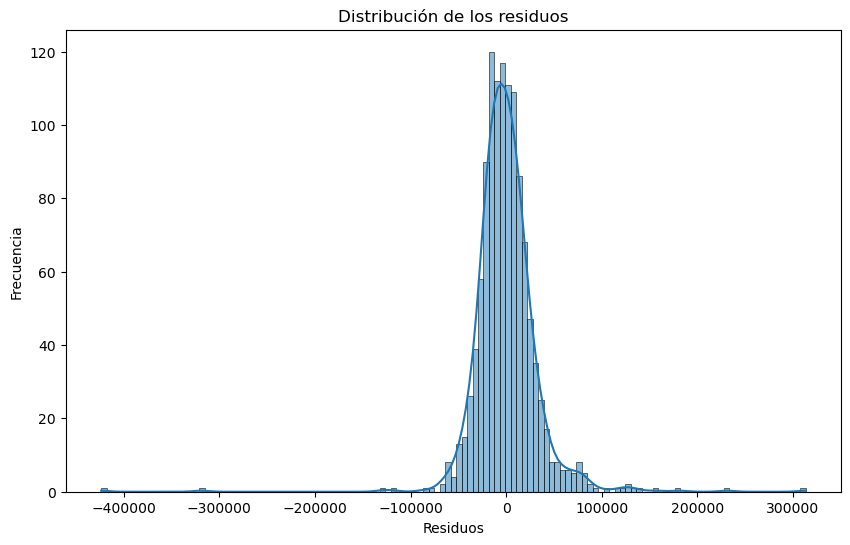

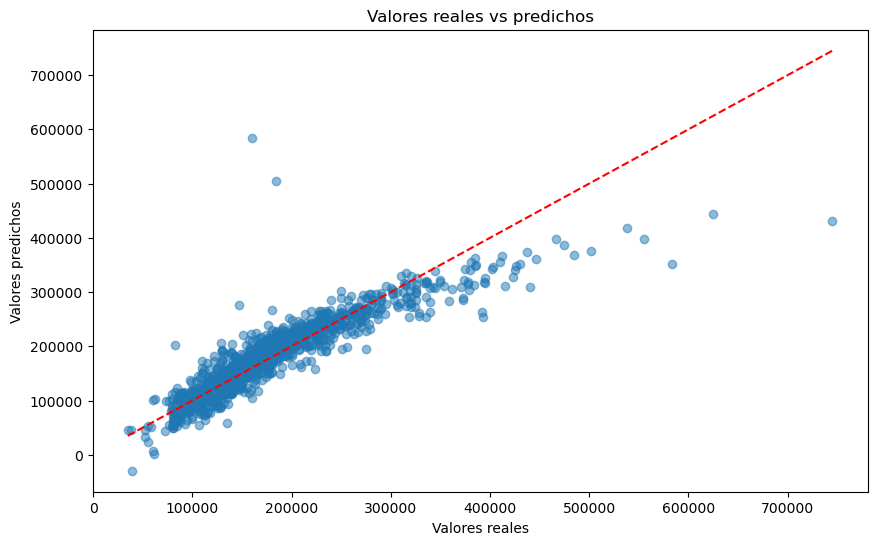

In [47]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

df_numeric = df_numeric.drop(columns=['Id'])

X = df_numeric.drop(columns=['SalePrice'])
y = df_numeric['SalePrice']

X = X.fillna(X.mean())

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

y_pred = model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Valores reales vs predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

# 9. Análisis del modelo

/usr/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         Variable           VIF
0           const  2.416363e+06
1      MSSubClass  1.655804e+00
2     LotFrontage  1.571264e+00
3         LotArea  1.255330e+00
4     OverallQual  3.259876e+00
5     OverallCond  1.594863e+00
6       YearBuilt  5.029276e+00
7    YearRemodAdd  2.422605e+00
8      MasVnrArea  1.394594e+00
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
13       1stFlrSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
16      GrLivArea           inf
17   BsmtFullBath  2.219414e+00
18   BsmtHalfBath  1.152990e+00
19       FullBath  2.950886e+00
20       HalfBath  2.167329e+00
21   BedroomAbvGr  2.328926e+00
22   KitchenAbvGr  1.593444e+00
23   TotRmsAbvGrd  4.885027e+00
24     Fireplaces  1.585403e+00
25    GarageYrBlt  3.367992e+00
26     GarageCars  5.576859e+00
27     GarageArea  5.468439e+00
28     WoodDeckSF  1.218662e+00
29    OpenPorchSF  1.222446e+00
30  Encl

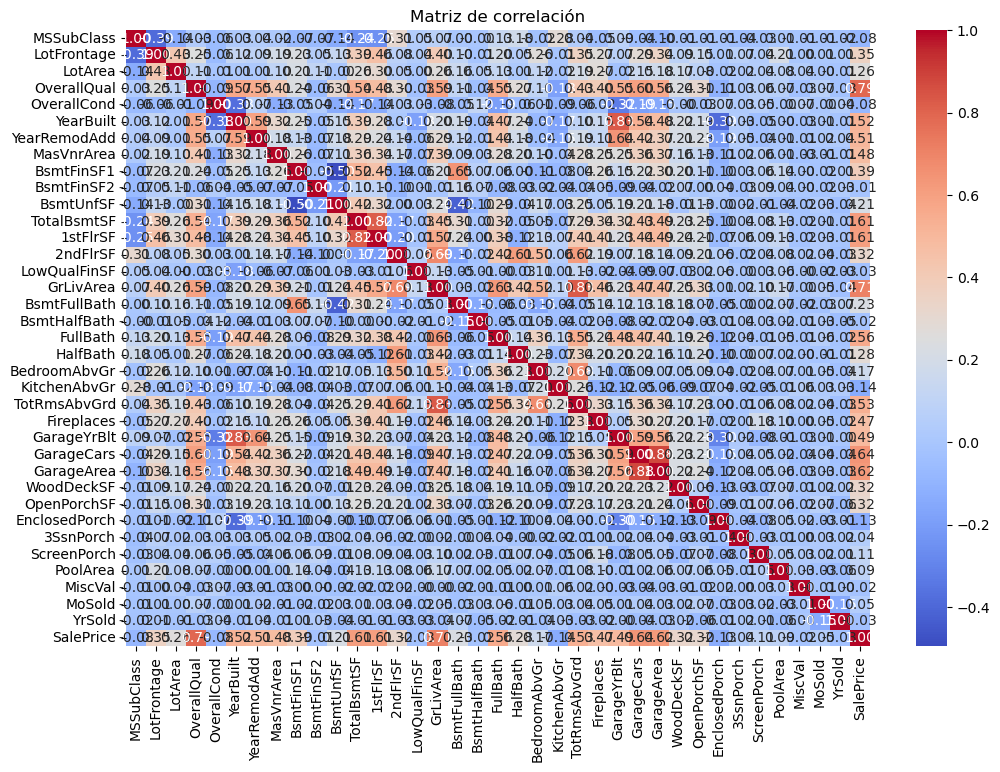

R² en entrenamiento: 0.8070260100167437
R² ajustado en prueba: 0.8012350871046248


In [48]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

train_score = model.rsquared
test_score = model.rsquared_adj
print(f"R² en entrenamiento: {train_score}")
print(f"R² ajustado en prueba: {test_score}")

# 10. Modelo con variables seleccionadas

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     484.8
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:40:22   Log-Likelihood:                -13945.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1159   BIC:                         2.795e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.938e+05   9.82e+04     -7.065      

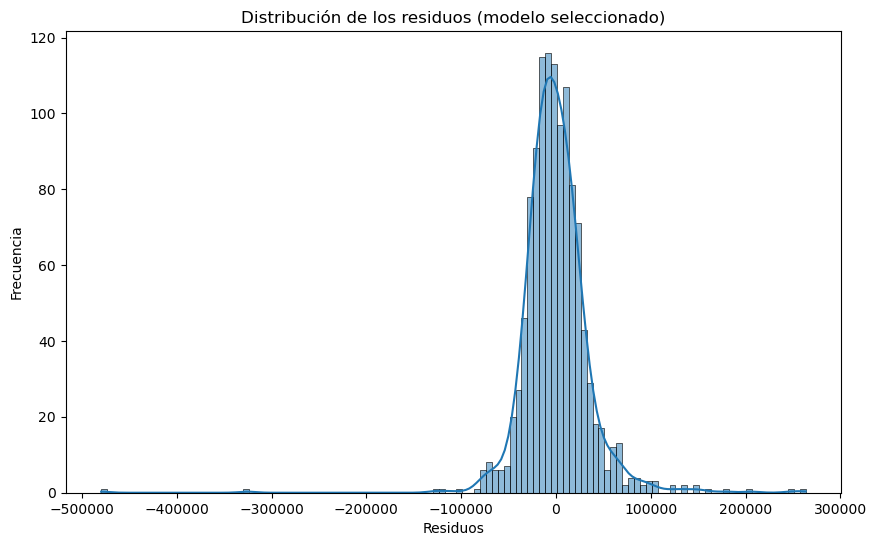

In [49]:
selected_vars = ['OverallQual', 'YearBuilt', 'BsmtUnfSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath']
X_selected = df_numeric[selected_vars]
X_selected = sm.add_constant(X_selected)

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model_sel = sm.OLS(y_train_sel, X_train_sel).fit()
print(model_sel.summary())

residuals_sel = model_sel.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals_sel, kde=True)
plt.title('Distribución de los residuos (modelo seleccionado)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# 11. Evaluación del modelo

MSE: 1512601537.8318355
R²: 0.8027982778079865


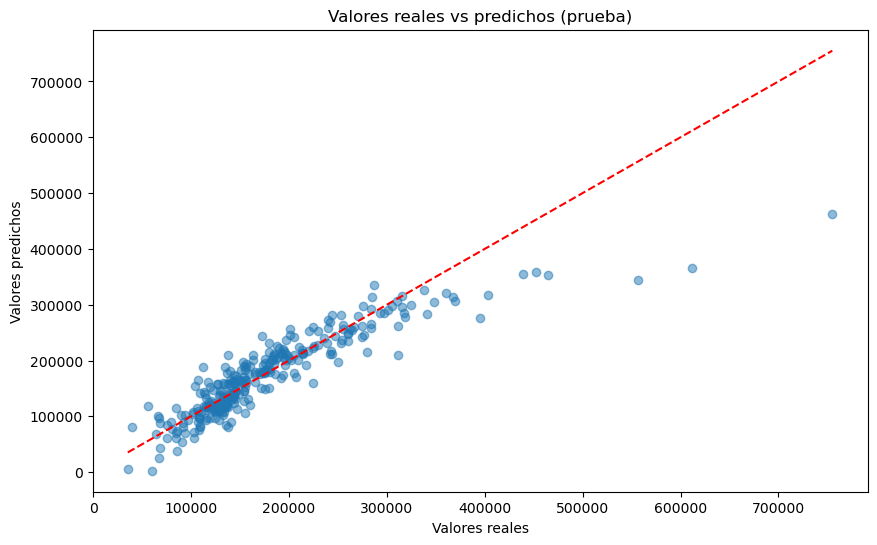

In [50]:
y_pred_test = model_sel.predict(X_test_sel)

mse = mean_squared_error(y_test_sel, y_pred_test)
r2 = r2_score(y_test_sel, y_pred_test)
print(f"MSE: {mse}")
print(f"R²: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sel, y_pred_test, alpha=0.5)
plt.plot([y_test_sel.min(), y_test_sel.max()], [y_test_sel.min(), y_test_sel.max()], 'r--')
plt.title('Valores reales vs predichos (prueba)')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

# 12. Discusión sobre modelos

R² del modelo completo: 0.81
R² del modelo seleccionado: 0.77


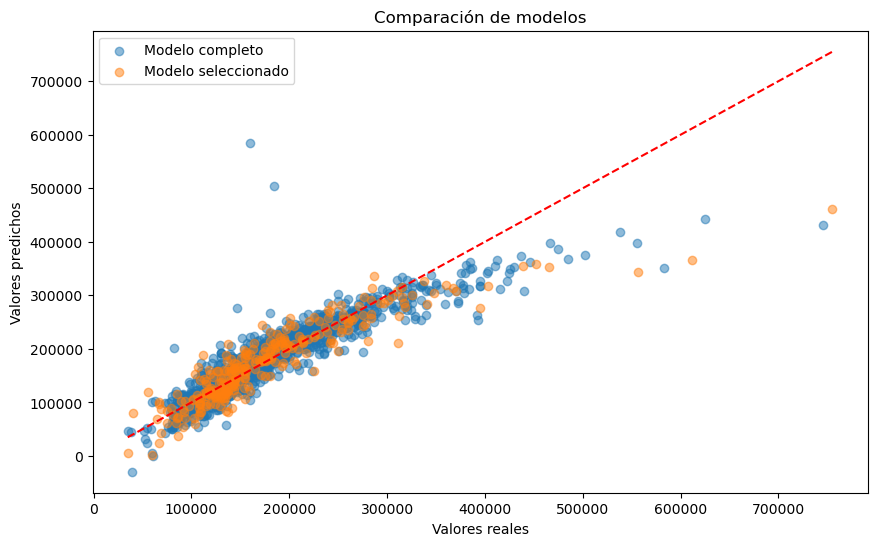

In [52]:
print(f"R² del modelo completo: {model.rsquared:.2f}")
print(f"R² del modelo seleccionado: {model_sel.rsquared:.2f}")



plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5, label='Modelo completo')
plt.scatter(y_test_sel, y_pred_test, alpha=0.5, label='Modelo seleccionado')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Comparación de modelos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.show()